# Project: Image Data Augmentation

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShawnHymel/computer-vision-with-embedded-machine-learning/blob/master/2.3.5%20-%20Project%20-%20Data%20Augmentation/project_image_data_augmentation.ipynb)

This is an example for creating an augmented dataset. It will transform input images to create a series of augmented samples that are saved in a new output directory.

Create a folder named "dataset" in the /content directory and upload your images there. The images should be divided into their respective classes, where each class has its own folder with the name of the class. For example:

<pre>
/content
    |- dataset
        |- background
        |- capacitor
        |- diode
        |- led
        |- resistor
</pre>

The original images along with their transforms will be saved in the output directory. Each output file will be the original filename appended with "_{num}" where {num} is some incrementing value based on the total number of transforms performed per image.

For example, if you have a file named "0.png" in /content/dataset/resistor, it will become "0_0.png" in /content/output/resistor. The first transform will be "0_1.png", the second transform will be "0_2.png" and so on.

Run each of the cells paying attention to their contents and output. Fill out the necessary parts of the functions where you find the following comment:

```
# >>> ENTER YOUR CODE HERE <<<
```

Author: EdgeImpulse, Inc.<br>
Date: August 3, 2021<br>
License: [Apache-2.0](apache.org/licenses/LICENSE-2.0)<br>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL

import skimage.transform
import skimage.util

In [48]:
### Settings

# Location of dataset and output folder
DATASET_PATH = "../../module 1/content/dataset"
OUT_PATH = "./output"
OUT_ZIP = "augmented_dataset.zip"

# File format to use for new dataset
IMG_EXT = ".png"

# You are welcome to change the seed to get different augmentation effects
SEED = 42
random.seed(SEED)

In [50]:
### Create output directory
try:
  os.makedirs(OUT_PATH)
except FileExistsError:
  print("WARNING: Output directory already exists. Check to make sure it is empty.")

## Transform Functions

Create one or more functions that transform an input image.

In [40]:
IMG_PATH = "D:/z_Dev/ai/Machine Learning/Coursera Embeded Machine Learning/module 1/content/dataset/resistor/0.png"

# Open image
image = PIL.Image.open(IMG_PATH)

# Convert the image to a Numpy array, optionally invert, and append to X
image = np.asarray(image)

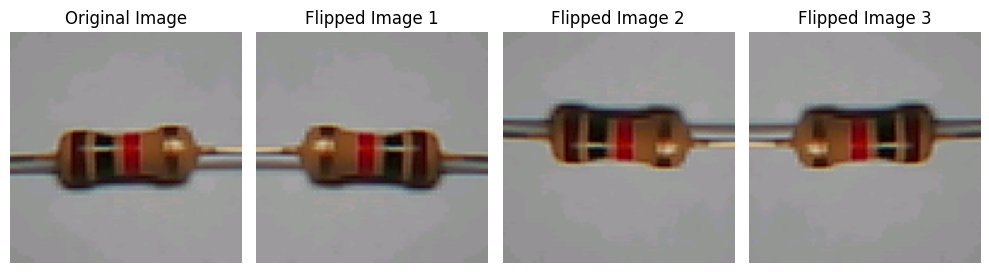

In [51]:
### Example: Function to create 3 new flipped images of the input
def create_flipped(img):

  # Create a list of flipped images
  flipped = []
  flipped.append(np.fliplr(img))
  flipped.append(np.flipud(img))
  flipped.append(np.flipud(np.fliplr(img)))

  return flipped

flippedImg = create_flipped(image)
# Plot original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)  # 1 row, 4 columns, first subplot
plt.imshow(image.squeeze(), vmin=0, vmax=255, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot flipped images
for i, flipped in enumerate(flippedImg, start=2):
    plt.subplot(1, 4, i)  # 1 row, 4 columns, subsequent subplots
    plt.imshow(flipped.squeeze(), vmin=0, vmax=255, cmap='gray')
    plt.title(f"Flipped Image {i-1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [52]:
from skimage import util

# Set the seed for reproducibility
np.random.seed(SEED)

def add_gaussian_noise(img, mean=0, var=0.01):
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, var ** 0.5, img.shape)

    # Add noise to the image and clip the values to stay in valid range
    noisy_img = np.clip(img + gaussian_noise * 255, 0, 255).astype(np.uint8)

    return noisy_img

def add_salt_and_pepper_noise(img, amount=0.02):
    # Add salt and pepper noise
    noisy_img = util.random_noise(img, mode='s&p', amount=amount)

    # Scale to 0-255 and convert to uint8
    noisy_img = (noisy_img * 255).astype(np.uint8)

    return noisy_img

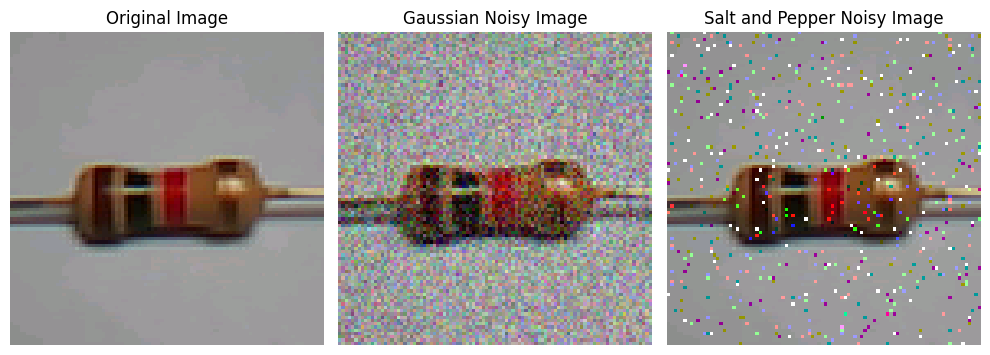

In [54]:
# Generate noisy images
Gimg = add_gaussian_noise(image)
Simg = add_salt_and_pepper_noise(image)

# Plot original and noisy images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.imshow(image.squeeze(), vmin=0, vmax=255, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gaussian Noisy Image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.imshow(Gimg.squeeze(), vmin=0, vmax=255, cmap='gray')
plt.title("Gaussian Noisy Image")
plt.axis('off')

# Salt and Pepper Noisy Image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.imshow(Simg.squeeze(), vmin=0, vmax=255, cmap='gray')
plt.title("Salt and Pepper Noisy Image")
plt.axis('off')

plt.tight_layout()
plt.show()


## Perform Transforms

Call your functions to create a set of augmented data.

In [55]:
### Function to open image and create a list of new transforms
# NOTE: You will need to call your functions here!
'''
def create_transforms(file_path):

  # Open the image
  imgs = PIL.Image.open(file_path)

  # Convert the image to a Numpy array (keep all color channels)
  img_array = np.asarray(imgs)

  # Add original image to front of list
  img_tfs = []
  img_tfs.append([img_array])

  # Perform transforms (call your functions)
  img_tfs.append(create_flipped(img_array))
  # >>> ENTER YOUR CODE HERE <<<
  img_tfs.append(add_gaussian_noise(img_array, mean=0, var=0.01))
  img_tfs.append(add_salt_and_pepper_noise(img_array, amount=0.02))
  

  # Flatten list of lists (to create one long list of images)
  img_tfs = [img for img_list in img_tfs for img in img_list]

  return img_tfs '''

def create_transforms(file_path):
    # Open the image
    imgs = PIL.Image.open(file_path)

    # Convert the image to a Numpy array (keep all color channels)
    img_array = np.asarray(imgs)

    # Add original image to front of list
    img_tfs = [img_array]

    # Perform transforms (call your functions)
    img_tfs.extend(create_flipped(img_array))
    img_tfs.append(add_gaussian_noise(img_array, mean=0, var=0.01))
    img_tfs.append(add_salt_and_pepper_noise(img_array, amount=0.02))

    return img_tfs

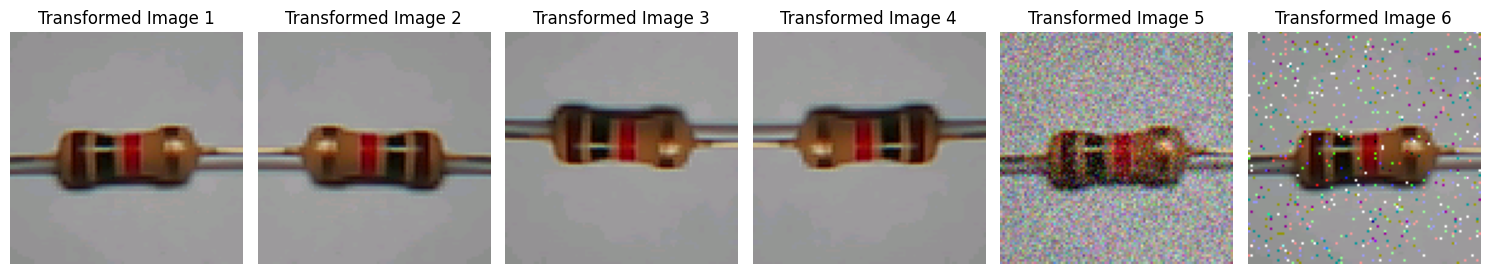

In [56]:
# Generate the transformed images
transformed_images = create_transforms(IMG_PATH)

# Plot all transformed images
plt.figure(figsize=(15, 10))

num_images = len(transformed_images)

for i, img in enumerate(transformed_images):
    plt.subplot(1, num_images, i + 1)  # 1 row, num_images columns, ith subplot
    plt.imshow(img.squeeze(), vmin=0, vmax=255, cmap='gray')
    plt.title(f"Transformed Image {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [57]:
### Load all images, create transforms, and save in output directory

# Find the directories in the dataset folder (skip the Jupyter Notebook checkpoints hidden folder)
for label in os.listdir(DATASET_PATH):
  class_dir = os.path.join(DATASET_PATH, label)
  if os.path.isdir(class_dir) and label != ".ipynb_checkpoints":

    # Create output directory
    out_path = os.path.join(OUT_PATH, label)
    os.makedirs(out_path, exist_ok=True)

    # Go through each image in the subfolder
    for i, filename in enumerate(os.listdir(class_dir)):

      # Skip the Jupyter Notebook checkpoints folder that sometimes gets added
      if filename != ".ipynb_checkpoints":

        # Get the root of the filename before the extension
        file_root = os.path.splitext(filename)[0]

        # Do all transforms for that one image
        file_path = os.path.join(DATASET_PATH, label, filename)
        img_tfs = create_transforms(file_path)

        # Save images to new files in output directory
        for i, img in enumerate(img_tfs):

          # Create a Pillow image from the Numpy array
          img_pil = PIL.Image.fromarray(img)

          # Construct filename (<orignal>_<transform_num>.<EXT>)
          out_file_path = os.path.join(out_path, file_root + "_" + str(i) + IMG_EXT)

          # Convert Numpy array to image and save as a file
          img_pil = PIL.Image.fromarray(img)
          img_pil.save(out_file_path)

In [58]:
import shutil

# Create a zip archive of the output directory
shutil.make_archive(OUT_ZIP.replace('.zip', ''), 'zip', OUT_PATH)

'd:\\z_Dev\\ai\\Machine Learning\\Coursera Embeded Machine Learning\\module 2\\Data Augmentation\\augmented_dataset.zip'